In [1]:
VN30_2019 = ["VNM",'TCB','VIC','MSN','HPG','VPB','VHM','VJC',
             'MWG','MBB','SAB','VCB','HDB','FPT','STB','NVL',
             'EIB','VRE','PNJ','GAS','SSI','CTG','GMD','CTD',
             'ROS','REE','SBT','CII','DPM','DHG']

In [2]:
from vnstock3 import Vnstock
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
# Fetch historical data for VN30
vnindex_data = Vnstock().stock(symbol='VN30')
vnindex_data = vnindex_data.quote.history(start='2017-08-24', end='2019-01-03')
vnindex_data['Return'] = vnindex_data['close'].pct_change()

beta_values = {}

2024-08-19 13:08:34,929 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


In [4]:
for symbol in VN30_2019:
    # Fetch historical data for each stock in VN30
    stock_data = Vnstock().stock(symbol=symbol)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2019-01-03')
    stock_data['Return'] = stock_data['close'].pct_change()

    # Merge the dataframes on date
    merged_data = pd.merge(stock_data[['time', 'Return']], vnindex_data[['time', 'Return']], on='time', suffixes=('_STOCK', '_VN30'))
    merged_data.dropna(inplace=True)  # Drop rows with NaN values

    # Perform linear regression to calculate beta
    if not merged_data.empty:
        beta, alpha, r_value, p_value, std_err = stats.linregress(merged_data['Return_VN30'], merged_data['Return_STOCK'])
        beta_values[symbol] = beta

2024-08-19 13:08:37,673 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:37,960 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:38,187 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:38,378 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:38,589 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:38,787 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:38,985 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:39,698 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [5]:
beta_values

{'VNM': np.float64(0.5965937688405157),
 'TCB': np.float64(1.0764264817117575),
 'VIC': np.float64(0.8241595078508411),
 'MSN': np.float64(1.1045779494272328),
 'HPG': np.float64(1.179324276052169),
 'VPB': np.float64(1.4417196755697967),
 'VHM': np.float64(0.3731951135562362),
 'VJC': np.float64(1.0280246438457112),
 'MWG': np.float64(1.017259845267381),
 'MBB': np.float64(1.2976559985608098),
 'SAB': np.float64(0.5108835789475535),
 'VCB': np.float64(1.3703396896137796),
 'HDB': np.float64(1.0938806410374688),
 'FPT': np.float64(0.9342534417597422),
 'STB': np.float64(1.2614676897495662),
 'NVL': np.float64(0.4187236086612735),
 'EIB': np.float64(0.48604185208301937),
 'VRE': np.float64(1.0631064938536783),
 'PNJ': np.float64(1.1110074409194763),
 'GAS': np.float64(1.435426662604883),
 'SSI': np.float64(1.461968187789989),
 'CTG': np.float64(1.6268810427271),
 'GMD': np.float64(0.8620222896541818),
 'CTD': np.float64(0.7046146819435494),
 'ROS': np.float64(0.8884887015298932),
 'REE'

In [6]:
vnindex_data

,time,open,high,low,close,volume,Return
0,2017-08-24 07:00:00,743.23,749.82,742.34,747.72,33630890,NaN
1,2017-08-25 07:00:00,746.87,751.14,746.87,751.14,32784240,0.004574
2,2017-08-28 07:00:00,751.59,758.02,749.20,758.02,42763860,0.009159
3,2017-08-29 07:00:00,757.84,758.76,754.59,754.59,44549640,-0.004525
4,2017-08-30 07:00:00,756.49,764.57,755.32,764.57,34232490,0.013226
...,...,...,...,...,...,...,...
335,2018-12-25 07:00:00,873.56,873.56,850.33,865.69,51475970,-0.009100
336,2018-12-26 07:00:00,865.96,867.88,860.52,861.02,32704590,-0.005395
337,2018-12-27 07:00:00,861.53,872.73,861.53,865.45,35751060,0.005145
338,2018-12-28 07:00:00,866.04,868.62,854.99,854.99,38254570,-0.012086


In [7]:
def calculate_return(df):
    if df.empty:
        return 0
    first_price = df['close'].iloc[0]
    final_price = df['close'].iloc[-1] 
    stock_return = ((final_price - first_price)/first_price) * 100
    return stock_return

In [8]:
stock_return = {}

for stock in VN30_2019:
    stock_data = Vnstock().stock(symbol=stock)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2019-01-03')
    return_rate = calculate_return(stock_data)
    stock_return[stock] = return_rate


2024-08-19 13:08:44,923 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:45,192 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:45,638 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:45,822 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:46,017 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:46,277 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:46,469 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:47,080 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [9]:
stock_return

{'VNM': np.float64(4.116161616161604),
 'TCB': np.float64(-25.01510574018127),
 'VIC': np.float64(178.9934354485777),
 'MSN': np.float64(70.8758731864589),
 'HPG': np.float64(27.937336814621418),
 'VPB': np.float64(-13.448735019973364),
 'VHM': np.float64(-16.858297078931013),
 'VJC': np.float64(62.00586674116496),
 'MWG': np.float64(9.665579119086464),
 'MBB': np.float64(8.36820083682008),
 'SAB': np.float64(0.5166744950681045),
 'VCB': np.float64(49.65337954939342),
 'HDB': np.float64(-26.149914821124366),
 'FPT': np.float64(4.279891304347819),
 'STB': np.float64(-1.276595744680854),
 'NVL': np.float64(34.975554719819485),
 'EIB': np.float64(17.18009478672987),
 'VRE': np.float64(-13.001555209953345),
 'PNJ': np.float64(35.51020408163266),
 'GAS': np.float64(51.54872828003022),
 'SSI': np.float64(16.71525753158407),
 'CTG': np.float64(4.2763157894736805),
 'GMD': np.float64(-14.559234144395687),
 'CTD': np.float64(-20.92889908256882),
 'ROS': np.float64(-54.11018530033578),
 'REE': n

In [10]:
stock_return_series = pd.Series(stock_return)
market_return = stock_return_series.mean()/100
market_return

np.float64(0.1016777394545934)

In [11]:
risk_free = [0.0598, 0.0471]
risk_free = pd.Series(risk_free)
R_f = risk_free.mean()
R_f

np.float64(0.05345)

In [12]:
df = pd.DataFrame(list(beta_values.items()), columns=['Stock', 'Beta'])

# Calculate the expected return using the CAPM formula
df['Expected Return'] = (R_f + df['Beta'] * (market_return - R_f)) *100
df

,Stock,Beta,Expected Return
0,VNM,0.596594,8.222237
1,TCB,1.076426,10.536362
2,VIC,0.824160,9.319735
3,MSN,1.104578,10.672130
4,HPG,1.179324,11.032614
5,VPB,1.441720,12.298088
6,VHM,0.373195,7.144836
7,VJC,1.028025,10.302930
8,MWG,1.017260,10.251014
9,MBB,1.297656,11.603302


In [13]:
top5_return = df.sort_values(by='Expected Return', ascending=False).head(5)
least_return = df.sort_values(by='Expected Return').head(5)
return_sorted = df.sort_values(by='Expected Return').reset_index(drop=True)
median_index = len(return_sorted) // 2
if len(return_sorted) % 2 == 0:
    median_stocks = return_sorted.iloc[median_index-2:median_index+3]
else:
    median_stocks = return_sorted.iloc[median_index-2:median_index+3]

print(median_stocks)
print(top5_return)
print(least_return)

   Stock      Beta  Expected Return
13   FPT  0.934253         9.850693
14   REE  0.966392        10.005690
15   MWG  1.017260        10.251014
16   VJC  1.028025        10.302930
17   VRE  1.063106        10.472122
   Stock      Beta  Expected Return
21   CTG  1.626881        13.191080
20   SSI  1.461968        12.395742
5    VPB  1.441720        12.298088
19   GAS  1.435427        12.267738
11   VCB  1.370340        11.953839
   Stock      Beta  Expected Return
6    VHM  0.373195         7.144836
27   CII  0.410483         7.324668
15   NVL  0.418724         7.364409
16   EIB  0.486042         7.689070
10   SAB  0.510884         7.808876


In [14]:
top5_beta = df.sort_values(by='Beta', ascending=False).head(5)
least_beta = df.sort_values(by='Beta').head(5)
beta_sorted = df.sort_values(by='Beta').reset_index(drop=True)
median_index = len(beta_sorted) // 2
if len(beta_sorted) % 2 == 0:
    median_beta = beta_sorted.iloc[median_index-2:median_index+3]
else:
    median_beta = beta_sorted.iloc[median_index-2:median_index+3]

print(median_beta)
print(top5_beta)
print(least_beta)

   Stock      Beta  Expected Return
13   FPT  0.934253         9.850693
14   REE  0.966392        10.005690
15   MWG  1.017260        10.251014
16   VJC  1.028025        10.302930
17   VRE  1.063106        10.472122
   Stock      Beta  Expected Return
21   CTG  1.626881        13.191080
20   SSI  1.461968        12.395742
5    VPB  1.441720        12.298088
19   GAS  1.435427        12.267738
11   VCB  1.370340        11.953839
   Stock      Beta  Expected Return
6    VHM  0.373195         7.144836
27   CII  0.410483         7.324668
15   NVL  0.418724         7.364409
16   EIB  0.486042         7.689070
10   SAB  0.510884         7.808876


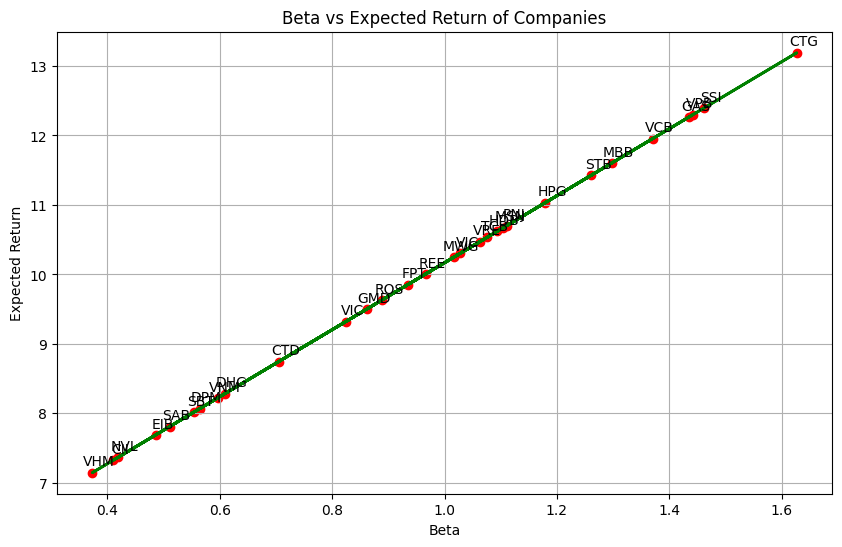

In [33]:
import matplotlib.pyplot as plt

# Plotting the chart with Beta on x-axis and Expected Return on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Beta'], df['Expected Return'], color='red')

# Line plot to connect all the points
plt.plot(df['Beta'], df['Expected Return'], color='green', linestyle='-', linewidth=2)

for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], df['Expected Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Beta vs Expected Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Expected Return')
plt.grid(True)
plt.show()

In [16]:
real_return = {}
for stock in VN30_2019:
    stock_data = Vnstock().stock(symbol=stock)
    stock_data = stock_data.quote.history(start='2017-08-24', end='2019-01-03')
    return_rate = calculate_return(stock_data)
    real_return[stock] = return_rate

2024-08-19 13:08:52,803 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:53,029 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:53,158 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:53,355 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:53,531 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:53,705 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:53,922 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-08-19 13:08:54,073 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yế

In [17]:
real_stock_return = pd.Series(real_return)
real_stock_return = pd.DataFrame(real_stock_return, columns=['Return'])
real_stock_return

,Return
VNM,4.116162
TCB,-25.015106
VIC,178.993435
MSN,70.875873
HPG,27.937337
VPB,-13.448735
VHM,-16.858297
VJC,62.005867
MWG,9.665579
MBB,8.368201


In [18]:
real_stock_return.sort_values(by='Return', ascending=False).head(10)

,Return
VIC,178.993435
MSN,70.875873
VJC,62.005867
GAS,51.548728
VCB,49.653380
PNJ,35.510204
NVL,34.975555
HPG,27.937337
EIB,17.180095
SSI,16.715258


C:\Users\Admin\AppData\Local\Temp\ipykernel_7032\2039225582.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')


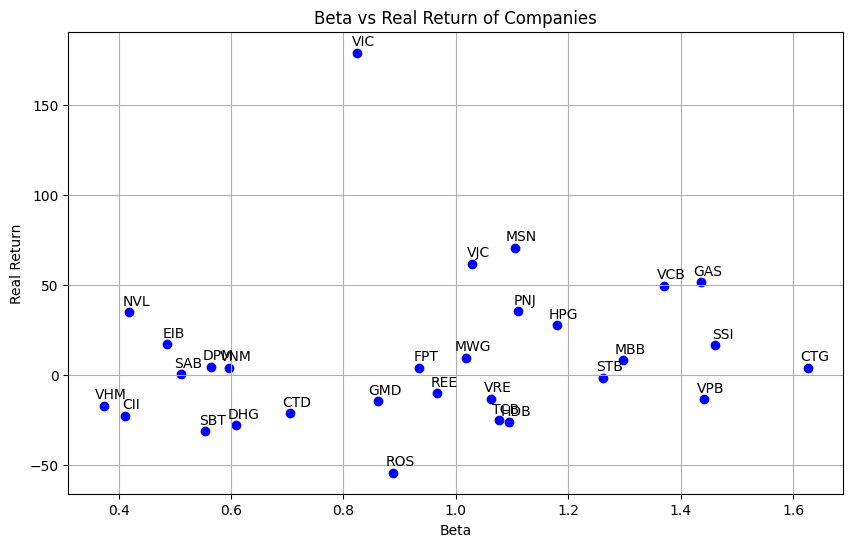

In [19]:
# Plotting the chart with Beta on x-axis and Expected Return on y-axis
plt.figure(figsize=(10, 6))
plt.scatter(df['Beta'], real_stock_return['Return'], color='blue')

for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center')

plt.title('Beta vs Real Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Real Return')
plt.grid(True)
plt.show()

In [20]:
real_stock_return['Return']

VNM      4.116162
TCB    -25.015106
VIC    178.993435
MSN     70.875873
HPG     27.937337
VPB    -13.448735
VHM    -16.858297
VJC     62.005867
MWG      9.665579
MBB      8.368201
SAB      0.516674
VCB     49.653380
HDB    -26.149915
FPT      4.279891
STB     -1.276596
NVL     34.975555
EIB     17.180095
VRE    -13.001555
PNJ     35.510204
GAS     51.548728
SSI     16.715258
CTG      4.276316
GMD    -14.559234
CTD    -20.928899
ROS    -54.110185
REE    -10.030864
SBT    -30.913140
CII    -22.368421
DPM      4.806202
DHG    -27.730590
Name: Return, dtype: float64

In [21]:
real_stock_return

,Return
VNM,4.116162
TCB,-25.015106
VIC,178.993435
MSN,70.875873
HPG,27.937337
VPB,-13.448735
VHM,-16.858297
VJC,62.005867
MWG,9.665579
MBB,8.368201


In [22]:
new_df = df.set_index('Stock')[['Expected Return']]
new_df

,Expected Return
Stock,
VNM,8.222237
TCB,10.536362
VIC,9.319735
MSN,10.672130
HPG,11.032614
VPB,12.298088
VHM,7.144836
VJC,10.302930
MWG,10.251014


In [23]:
concatenated_df = pd.concat([real_stock_return, new_df], axis=1)
concatenated_df

,Return,Expected Return
VNM,4.116162,8.222237
TCB,-25.015106,10.536362
VIC,178.993435,9.319735
MSN,70.875873,10.672130
HPG,27.937337,11.032614
VPB,-13.448735,12.298088
VHM,-16.858297,7.144836
VJC,62.005867,10.302930
MWG,9.665579,10.251014
MBB,8.368201,11.603302


In [24]:
concatenated_df['Deviation'] = concatenated_df['Return'] - concatenated_df['Expected Return']
variance_deviation = concatenated_df['Deviation'].var()
std_deviation = concatenated_df['Deviation'].std()


In [25]:
print(variance_deviation)
print(std_deviation)

1869.2557168473961
43.23489004088476


In [26]:
concatenated_df

,Return,Expected Return,Deviation
VNM,4.116162,8.222237,-4.106075
TCB,-25.015106,10.536362,-35.551467
VIC,178.993435,9.319735,169.673700
MSN,70.875873,10.672130,60.203743
HPG,27.937337,11.032614,16.904722
VPB,-13.448735,12.298088,-25.746823
VHM,-16.858297,7.144836,-24.003133
VJC,62.005867,10.302930,51.702936
MWG,9.665579,10.251014,-0.585435
MBB,8.368201,11.603302,-3.235101


In [27]:
concatenated_df.sort_values(by='Deviation')

,Return,Expected Return,Deviation
ROS,-54.110185,9.629980,-63.740165
SBT,-30.913140,8.018137,-38.931277
HDB,-26.149915,10.620539,-36.770454
DHG,-27.730590,8.282167,-36.012756
TCB,-25.015106,10.536362,-35.551467
CII,-22.368421,7.324668,-29.693089
CTD,-20.928899,8.743197,-29.672096
VPB,-13.448735,12.298088,-25.746823
GMD,-14.559234,9.502339,-24.061573
VHM,-16.858297,7.144836,-24.003133


C:\Users\Admin\AppData\Local\Temp\ipykernel_7032\1958334047.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center', color='green')


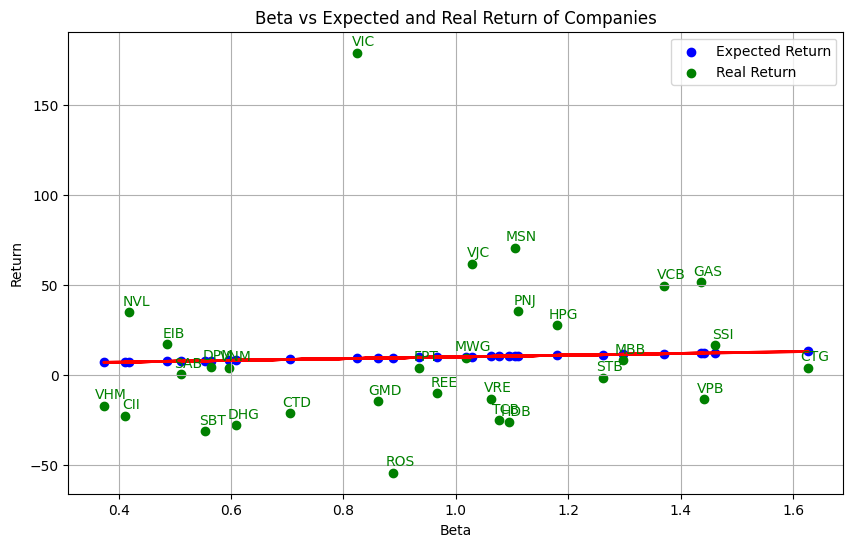

In [34]:
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' and 'real_stock_return' are already defined
plt.figure(figsize=(10, 6))

# Scatter plot for Expected Return
plt.scatter(df['Beta'], df['Expected Return'], color='blue', label='Expected Return')
plt.plot(df['Beta'], df['Expected Return'], color='red', linestyle='-', linewidth=2)

# Scatter plot for Real Return
plt.scatter(df['Beta'], real_stock_return['Return'], color='green', label='Real Return')

# Annotating each point with the corresponding stock name for Expected Return
# for i, txt in enumerate(df['Stock']):
#     plt.annotate(txt, (df['Beta'][i], df['Expected Return'][i]), textcoords="offset points", xytext=(5,5), ha='center', color='blue')

# Annotating each point with the corresponding stock name for Real Return
for i, txt in enumerate(df['Stock']):
    plt.annotate(txt, (df['Beta'][i], real_stock_return['Return'][i]), textcoords="offset points", xytext=(5,5), ha='center', color='green')

# Adding title and labels
plt.title('Beta vs Expected and Real Return of Companies')
plt.xlabel('Beta')
plt.ylabel('Return')
plt.grid(True)
plt.legend()  # Adding legend to differentiate between the two plots

# Show plot
plt.show()